# Project_1 : Regression:-   Predicting the total sale of a shop

##### Parsis Presswala
##### Bablu Prajapat
##### Shakti Singh Rathore
##### Sourav Gajbhiye
##### Nikhil Gaikwad

### Project Proposal : 
Predicting the total sale of a shop based on weekly visits of customers and the amount spent by them.

### DataSet Description:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("BigML.csv")
df.head()

,CUSTOMER_ID,Total_Sale,STD_Sales,Hist_Visits,W1_Min_Sale,W1_STD_Sales,W1_Visits,W2_Min_Sale,W2_STD_Sales,W2_Visits,...,W5_Visits,week_1,week_2,week_3,week_4,APV,Days_since_last_visit,CHURN,Customer_Value,Visitors_Type
0,7260,7.585687,3.988061,2.708050,4.241039,3.958143,4,4.926964,3.033436,3,...,1,1,1,1,1,4.953208,0.000000,0,Regular,Regular_Visitors
1,11024,6.338523,3.163263,2.302585,3.958143,2.573045,2,3.958143,0.000000,1,...,1,1,1,1,1,4.155335,0.000000,1,Regular,Regular_Visitors
2,12476,5.043941,0.000000,1.386294,0.000000,0.000000,0,3.958143,0.000000,1,...,1,0,1,1,0,3.958143,2.639057,1,Regular,Regular_Visitors
3,14156,6.648207,3.670753,1.791759,5.148657,0.000000,1,5.148657,0.000000,1,...,1,1,1,1,1,5.043941,1.386294,0,Regular,Regular_Visitors
4,17606,5.838896,0.000000,1.098612,5.148657,0.000000,1,0.000000,0.000000,0,...,1,1,0,0,0,5.148657,1.609438,1,Regular,Regular_Visitors


In [4]:
df.sample(10)

,CUSTOMER_ID,Total_Sale,STD_Sales,Hist_Visits,W1_Min_Sale,W1_STD_Sales,W1_Visits,W2_Min_Sale,W2_STD_Sales,W2_Visits,...,W5_Visits,week_1,week_2,week_3,week_4,APV,Days_since_last_visit,CHURN,Customer_Value,Visitors_Type
17377,83797626,7.158514,5.259615,1.791759,5.148657,0.000000,1,5.148657,0.0,1,...,1,1,1,1,1,5.552184,1.386294,1,Regular,Regular_Visitors
3976,15489248,3.958143,0.000000,0.693147,0.000000,0.000000,0,0.000000,0.0,0,...,1,0,0,0,0,3.958143,3.433987,1,Regular,Rare_Visitor
15824,75049796,6.901697,3.021390,1.791759,5.148657,3.619449,2,0.000000,0.0,0,...,1,1,0,1,0,5.296275,1.609438,0,Regular,Regular_Visitors
34576,436175042,5.409680,2.387316,1.386294,0.000000,0.000000,0,4.241039,0.0,1,...,2,0,1,0,0,4.319974,2.397895,1,Regular,Regular_Visitors
49919,1049605144,6.397263,4.119498,1.098612,0.000000,0.000000,0,0.000000,0.0,0,...,1,0,0,0,1,5.705780,3.295837,1,Regular,Regular_Visitors
63700,1109760798,6.530586,3.868803,1.791759,5.148657,0.000000,1,5.148657,0.0,1,...,1,1,1,0,1,4.926964,1.098612,1,Regular,Regular_Visitors
5533,22475002,5.552184,3.283914,1.609438,0.000000,0.000000,0,3.958143,0.0,1,...,1,0,1,1,1,4.177459,2.639057,0,Regular,Regular_Visitors
53644,1075054602,5.043941,2.573045,1.098612,0.000000,0.000000,0,0.000000,0.0,0,...,2,0,0,0,0,4.357222,3.401197,1,Regular,Regular_Visitors
13462,61420938,5.616480,2.706611,1.609438,3.958143,2.573045,2,4.241039,0.0,1,...,1,1,1,0,0,4.241039,1.098612,1,Regular,Regular_Visitors
45041,1026033758,7.015533,4.351090,1.791759,4.461300,4.804486,2,5.552184,0.0,1,...,1,1,1,1,0,5.409680,1.386294,0,Regular,Regular_Visitors


### Conclusion: Randomly selects the sample from dataset

In [5]:
df.columns

Index(['CUSTOMER_ID', 'Total_Sale', 'STD_Sales', 'Hist_Visits', 'W1_Min_Sale',
       'W1_STD_Sales', 'W1_Visits', 'W2_Min_Sale', 'W2_STD_Sales', 'W2_Visits',
       'W3_Sale', 'W3_Max_Sale', 'W3_Min_Sale', 'W3_STD_Sales', 'W3_Visits',
       'W4_Sale', 'W4_Min_Sale', 'W4_STD_Sales', 'W4_Visits', 'W5_STD_Sales',
       'W5_Visits', 'week_1', 'week_2', 'week_3', 'week_4', 'APV',
       'Days_since_last_visit', 'CHURN', 'Customer_Value', 'Visitors_Type'],
      dtype='object')

### Conclusion: Shows the names of columns of our dataset

In [6]:
# df.dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73358 entries, 0 to 73357
Data columns (total 30 columns):
CUSTOMER_ID              73358 non-null int64
Total_Sale               73358 non-null float64
STD_Sales                73358 non-null float64
Hist_Visits              73358 non-null float64
W1_Min_Sale              73358 non-null float64
W1_STD_Sales             73358 non-null float64
W1_Visits                73358 non-null int64
W2_Min_Sale              73358 non-null float64
W2_STD_Sales             73358 non-null float64
W2_Visits                73358 non-null int64
W3_Sale                  73358 non-null float64
W3_Max_Sale              73358 non-null float64
W3_Min_Sale              73358 non-null float64
W3_STD_Sales             73358 non-null float64
W3_Visits                73358 non-null int64
W4_Sale                  73358 non-null float64
W4_Min_Sale              73358 non-null float64
W4_STD_Sales             73358 non-null float64
W4_Visits                73358 non-

### Conclusion: We can see from column details, 17 columns of float64 datatype, 11 columns of int64 datatype, 2 columns of object datatype.

In [7]:
df.describe(include="all")

,CUSTOMER_ID,Total_Sale,STD_Sales,Hist_Visits,W1_Min_Sale,W1_STD_Sales,W1_Visits,W2_Min_Sale,W2_STD_Sales,W2_Visits,...,W5_Visits,week_1,week_2,week_3,week_4,APV,Days_since_last_visit,CHURN,Customer_Value,Visitors_Type
count,7.335800e+04,73358.000000,73358.000000,73358.000000,73358.000000,73358.000000,73358.000000,73358.000000,73358.000000,73358.000000,...,73358.000000,73358.000000,73358.000000,73358.000000,73358.000000,73358.000000,73358.000000,73358.000000,73358,73358
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Regular,Regular_Visitors
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73317,66808
mean,5.905069e+08,6.426204,2.761568,1.871061,3.184040,0.813153,1.265642,3.218595,0.829085,1.293165,...,1.395867,0.684765,0.693980,0.737302,0.687478,4.778062,1.515539,0.332179,NaN,NaN
std,4.829079e+08,0.909831,1.766353,0.597875,2.214813,1.589608,1.245915,2.191992,1.598726,1.258038,...,0.712480,0.464613,0.460841,0.440103,0.463525,0.539068,1.059617,0.470998,NaN,NaN
min,7.260000e+03,0.000000,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,8.923158e+07,5.838896,0.000000,1.386294,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,4.393131,0.693147,0.000000,NaN,NaN
50%,7.780466e+08,6.530586,3.334669,1.945910,4.241039,0.000000,1.000000,4.241039,0.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,4.695255,1.386294,0.000000,NaN,NaN
75%,1.080219e+09,7.103750,4.013917,2.302585,4.641695,0.000000,2.000000,4.641695,0.000000,2.000000,...,2.000000,1.000000,1.000000,1.000000,1.000000,5.148657,2.302585,1.000000,NaN,NaN


### Conclusion: From the description, we can see that we don't have any missing values in our dataset, we ha several other details of each variables like, mean, standard Deviation,min, max, 1st quartile (25% data), 2nd quartile (50% data), 3rd quartile (75% data).

In [8]:
df.shape

(73358, 30)

### Conclusion: We have total 73358 records and 30 variables, means we do have 22,00,740 observations‬

In [9]:
df.isna().sum()

CUSTOMER_ID              0
Total_Sale               0
STD_Sales                0
Hist_Visits              0
W1_Min_Sale              0
W1_STD_Sales             0
W1_Visits                0
W2_Min_Sale              0
W2_STD_Sales             0
W2_Visits                0
W3_Sale                  0
W3_Max_Sale              0
W3_Min_Sale              0
W3_STD_Sales             0
W3_Visits                0
W4_Sale                  0
W4_Min_Sale              0
W4_STD_Sales             0
W4_Visits                0
W5_STD_Sales             0
W5_Visits                0
week_1                   0
week_2                   0
week_3                   0
week_4                   0
APV                      0
Days_since_last_visit    0
CHURN                    0
Customer_Value           0
Visitors_Type            0
dtype: int64

### Conclusion: We do not have any missing values and to evaluate a good model we need to impute some missing missing values.

# Impute 10 % nan values in datadet

In [10]:
import random
df_ = df.copy()
df1 = df.mask(np.random.random(df.shape) < .10)
df1.head()

,CUSTOMER_ID,Total_Sale,STD_Sales,Hist_Visits,W1_Min_Sale,W1_STD_Sales,W1_Visits,W2_Min_Sale,W2_STD_Sales,W2_Visits,...,W5_Visits,week_1,week_2,week_3,week_4,APV,Days_since_last_visit,CHURN,Customer_Value,Visitors_Type
0,7260.0,NaN,3.988061,2.708050,4.241039,3.958143,NaN,4.926964,NaN,3.0,...,1.0,1.0,1.0,1.0,1.0,4.953208,0.000000,0.0,Regular,Regular_Visitors
1,11024.0,6.338523,3.163263,2.302585,3.958143,2.573045,2.0,3.958143,0.0,1.0,...,1.0,NaN,1.0,1.0,1.0,4.155335,0.000000,1.0,Regular,Regular_Visitors
2,12476.0,5.043941,0.000000,1.386294,0.000000,0.000000,0.0,3.958143,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,NaN,2.639057,1.0,Regular,Regular_Visitors
3,14156.0,6.648207,3.670753,1.791759,5.148657,0.000000,1.0,5.148657,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,5.043941,1.386294,NaN,Regular,Regular_Visitors
4,17606.0,5.838896,0.000000,1.098612,5.148657,0.000000,1.0,0.000000,0.0,NaN,...,1.0,1.0,0.0,0.0,0.0,NaN,NaN,1.0,Regular,NaN


In [11]:
df1.isnull().sum()

CUSTOMER_ID              7455
Total_Sale               7257
STD_Sales                7305
Hist_Visits              7293
W1_Min_Sale              7396
W1_STD_Sales             7292
W1_Visits                7411
W2_Min_Sale              7460
W2_STD_Sales             7282
W2_Visits                7455
W3_Sale                  7312
W3_Max_Sale              7257
W3_Min_Sale              7464
W3_STD_Sales             7220
W3_Visits                7333
W4_Sale                  7435
W4_Min_Sale              7293
W4_STD_Sales             7396
W4_Visits                7461
W5_STD_Sales             7266
W5_Visits                7268
week_1                   7384
week_2                   7295
week_3                   7341
week_4                   7485
APV                      7287
Days_since_last_visit    7252
CHURN                    7281
Customer_Value           7246
Visitors_Type            7348
dtype: int64

### Conclusion: We have imputed 10% missing values by using mask() function using random library.

In [12]:
df1.sample(5)

,CUSTOMER_ID,Total_Sale,STD_Sales,Hist_Visits,W1_Min_Sale,W1_STD_Sales,W1_Visits,W2_Min_Sale,W2_STD_Sales,W2_Visits,...,W5_Visits,week_1,week_2,week_3,week_4,APV,Days_since_last_visit,CHURN,Customer_Value,Visitors_Type
23965,1.206602e+08,7.045811,3.682787,2.197225,4.641695,0.000000,1.0,5.148657,0.0,1.0,...,1.0,1.0,NaN,1.0,1.0,4.972449,1.609438,0.0,Regular,Regular_Visitors
782,NaN,6.901697,4.364995,2.079442,4.641695,0.000000,2.0,5.733859,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,4.961805,1.098612,0.0,Regular,Regular_Visitors
19723,NaN,NaN,2.836265,2.708050,3.958143,3.033436,3.0,4.461300,0.0,3.0,...,3.0,1.0,1.0,1.0,1.0,4.341428,0.000000,0.0,Regular,NaN
62531,1.105998e+09,6.138245,3.855573,1.791759,5.148657,NaN,1.0,0.000000,0.0,0.0,...,1.0,1.0,0.0,1.0,1.0,4.537405,0.000000,0.0,Regular,Regular_Visitors
30415,1.618412e+08,7.131507,5.759834,NaN,6.397263,NaN,1.0,NaN,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,6.034492,NaN,1.0,Regular,Regular_Visitors


### Conclusion : Sample method will randomly return the 5 samples from the dataset

In [13]:
df1=df1.drop('Total_Sale', axis = 1)
df1=pd.concat([df1,df_["Total_Sale"]],axis=1)
df1.head()

,CUSTOMER_ID,STD_Sales,Hist_Visits,W1_Min_Sale,W1_STD_Sales,W1_Visits,W2_Min_Sale,W2_STD_Sales,W2_Visits,W3_Sale,...,week_1,week_2,week_3,week_4,APV,Days_since_last_visit,CHURN,Customer_Value,Visitors_Type,Total_Sale
0,7260.0,3.988061,2.708050,4.241039,3.958143,NaN,4.926964,NaN,3.0,NaN,...,1.0,1.0,1.0,1.0,4.953208,0.000000,0.0,Regular,Regular_Visitors,7.585687
1,11024.0,3.163263,2.302585,3.958143,2.573045,2.0,3.958143,0.0,1.0,5.043941,...,NaN,1.0,1.0,1.0,4.155335,0.000000,1.0,Regular,Regular_Visitors,6.338523
2,12476.0,0.000000,1.386294,0.000000,0.000000,0.0,3.958143,0.0,1.0,3.958143,...,0.0,1.0,1.0,0.0,NaN,2.639057,1.0,Regular,Regular_Visitors,5.043941
3,14156.0,3.670753,1.791759,5.148657,0.000000,1.0,5.148657,0.0,1.0,4.461300,...,1.0,1.0,1.0,1.0,5.043941,1.386294,NaN,Regular,Regular_Visitors,6.648207
4,17606.0,0.000000,1.098612,5.148657,0.000000,1.0,0.000000,0.0,NaN,0.000000,...,1.0,0.0,0.0,0.0,NaN,NaN,1.0,Regular,NaN,5.838896


In [14]:
df1.isnull().sum()

CUSTOMER_ID              7455
STD_Sales                7305
Hist_Visits              7293
W1_Min_Sale              7396
W1_STD_Sales             7292
W1_Visits                7411
W2_Min_Sale              7460
W2_STD_Sales             7282
W2_Visits                7455
W3_Sale                  7312
W3_Max_Sale              7257
W3_Min_Sale              7464
W3_STD_Sales             7220
W3_Visits                7333
W4_Sale                  7435
W4_Min_Sale              7293
W4_STD_Sales             7396
W4_Visits                7461
W5_STD_Sales             7266
W5_Visits                7268
week_1                   7384
week_2                   7295
week_3                   7341
week_4                   7485
APV                      7287
Days_since_last_visit    7252
CHURN                    7281
Customer_Value           7246
Visitors_Type            7348
Total_Sale                  0
dtype: int64

### Conclusion : Total_sale is our dependent variable, we have not provide missing value to our dependent variable, so keep the original value for dependent variable and independet variable contains null values.

# Multicollinearity: It can be tested through VIF,Correlation matrix

In [15]:
df1.corr(method='pearson')

,CUSTOMER_ID,STD_Sales,Hist_Visits,W1_Min_Sale,W1_STD_Sales,W1_Visits,W2_Min_Sale,W2_STD_Sales,W2_Visits,W3_Sale,...,W5_STD_Sales,W5_Visits,week_1,week_2,week_3,week_4,APV,Days_since_last_visit,CHURN,Total_Sale
CUSTOMER_ID,1.000000,-0.038880,-0.096403,-0.106671,-0.054841,-0.082663,-0.089087,-0.048860,-0.070764,-0.093953,...,-0.013854,-0.016089,-0.102176,-0.085690,-0.083583,-0.067086,-0.053086,0.110016,0.104589,-0.112668
STD_Sales,-0.038880,1.000000,0.446402,0.294936,0.330039,0.278706,0.293569,0.336239,0.279389,0.371083,...,0.291595,0.202273,0.288086,0.284904,0.314137,0.326020,0.289414,-0.332530,-0.207901,0.555338
Hist_Visits,-0.096403,0.446402,1.000000,0.569688,0.486978,0.757436,0.580774,0.486958,0.771146,0.702867,...,0.372060,0.544254,0.619348,0.627784,0.635683,0.649853,-0.039289,-0.709910,-0.489366,0.795224
W1_Min_Sale,-0.106671,0.294936,0.569688,1.000000,0.277882,0.620638,0.350362,0.202609,0.326849,0.406792,...,0.121863,0.149009,0.975365,0.340373,0.360912,0.322799,0.190309,-0.779231,-0.358871,0.589331
W1_STD_Sales,-0.054841,0.330039,0.486978,0.277882,1.000000,0.631402,0.216024,0.323400,0.371822,0.281653,...,0.233664,0.262191,0.347071,0.239805,0.224189,0.237382,0.051344,-0.441127,-0.236636,0.414952
W1_Visits,-0.082663,0.278706,0.757436,0.620638,0.631402,1.000000,0.329751,0.351553,0.588682,0.425312,...,0.257373,0.404599,0.689451,0.371015,0.360328,0.360015,-0.037429,-0.753462,-0.386388,0.580179
W2_Min_Sale,-0.089087,0.293569,0.580774,0.350362,0.216024,0.329751,1.000000,0.275524,0.611868,0.392566,...,0.126189,0.157761,0.341932,0.975081,0.352519,0.354425,0.158099,-0.464104,-0.382130,0.582948
W2_STD_Sales,-0.048860,0.336239,0.486958,0.202609,0.323400,0.351553,0.275524,1.000000,0.625132,0.284967,...,0.238306,0.266131,0.224797,0.346074,0.229216,0.241994,0.048551,-0.292595,-0.231700,0.413743
W2_Visits,-0.070764,0.279389,0.771146,0.326849,0.371822,0.588682,0.611868,0.625132,1.000000,0.422430,...,0.267870,0.427105,0.368127,0.682514,0.360465,0.378124,-0.057314,-0.496274,-0.380157,0.579765
W3_Sale,-0.093953,0.371083,0.702867,0.406792,0.281653,0.425312,0.392566,0.284967,0.422430,1.000000,...,0.192052,0.252951,0.407297,0.388259,0.965871,0.394756,0.139977,-0.465200,-0.392239,0.669296


### Conclusion: Here, we can see the relationship of 'Total_Sale' with other variables like CUSTOMER_ID, Days_since_last_visit, CHURN have very low score of correlation coefficient which means they did not have linear relationship with those variables.

In [16]:
df1.Customer_Value.value_counts()

Regular       66076
High_Value       32
Low_Value         4
Name: Customer_Value, dtype: int64

In [17]:
df1.Days_since_last_visit.value_counts()

0.000000    11529
0.693147     9653
1.098612     7441
1.386294     5770
1.609438     4554
1.791759     3578
1.945910     2737
2.079442     2005
2.197225     1690
2.302585     1457
2.397895     1202
2.484907     1146
3.367296     1098
3.401197     1080
2.564949      980
3.465736      964
3.433987      956
3.496508      910
2.639057      901
2.995732      897
2.708050      804
2.772589      699
2.833213      646
2.890372      494
2.944439      487
3.044522      377
3.135494      347
3.091042      346
3.218876      335
3.178054      303
3.258097      286
3.295837      222
3.332205      212
Name: Days_since_last_visit, dtype: int64

In [18]:
df1.CHURN.value_counts()

0.0    44091
1.0    21986
Name: CHURN, dtype: int64

In [17]:
df1.drop(['CUSTOMER_ID','Days_since_last_visit','CHURN','Customer_Value'],axis=1,inplace=True)
df1.head()

,STD_Sales,Hist_Visits,W1_Min_Sale,W1_STD_Sales,W1_Visits,W2_Min_Sale,W2_STD_Sales,W2_Visits,W3_Sale,W3_Max_Sale,...,W4_Visits,W5_STD_Sales,W5_Visits,week_1,week_2,week_3,week_4,APV,Visitors_Type,Total_Sale
0,3.988061,2.708050,NaN,3.958143,4.0,4.926964,3.033436,3.0,6.243390,5.552184,...,2.0,0.0,1.0,NaN,1.0,1.0,1.0,4.953208,Regular_Visitors,7.585687
1,3.163263,2.302585,3.958143,2.573045,NaN,NaN,0.000000,1.0,5.043941,3.958143,...,2.0,NaN,1.0,NaN,1.0,1.0,1.0,4.155335,Regular_Visitors,6.338523
2,0.000000,1.386294,0.000000,0.000000,0.0,3.958143,0.000000,1.0,3.958143,3.958143,...,0.0,0.0,1.0,0.0,NaN,1.0,0.0,3.958143,Regular_Visitors,5.043941
3,3.670753,1.791759,5.148657,NaN,1.0,NaN,NaN,1.0,NaN,4.461300,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,5.043941,Regular_Visitors,6.648207
4,0.000000,1.098612,5.148657,0.000000,1.0,0.000000,NaN,0.0,0.000000,0.000000,...,0.0,0.0,NaN,1.0,NaN,0.0,0.0,5.148657,Regular_Visitors,5.838896


### Conclusion: We have removed the variables which have very low coefficient scores means values which are closely zero.

In [19]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf
from statsmodels.tools.tools import add_constant

In [20]:
X=df1.loc[:, df1.columns != 'Total_Sale']

#Using user defined function to calculate VIF Score

def vif_cal(input_data, dependent_col):
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0, xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=smf.ols(formula='y~x', data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print( " VIF score for", xvar_names[i], "is:-" , vif)

In [21]:
X = df1.drop(['Visitors_Type'], axis = 1)
vif_cal(X,'Total_Sale')

 VIF score for STD_Sales is:- 1.81
 VIF score for Hist_Visits is:- 38.26
 VIF score for W1_Min_Sale is:- 44.25
 VIF score for W1_STD_Sales is:- 1.99
 VIF score for W1_Visits is:- 5.28
 VIF score for W2_Min_Sale is:- 42.13
 VIF score for W2_STD_Sales is:- 2.01
 VIF score for W2_Visits is:- 5.41
 VIF score for W3_Sale is:- 440.22
 VIF score for W3_Max_Sale is:- 350.27
 VIF score for W3_Min_Sale is:- 285.53
 VIF score for W3_STD_Sales is:- 8.29
 VIF score for W3_Visits is:- 23.4
 VIF score for W4_Sale is:- 380.01
 VIF score for W4_Min_Sale is:- 287.96
 VIF score for W4_STD_Sales is:- 5.11
 VIF score for W4_Visits is:- 20.8
 VIF score for W5_STD_Sales is:- 1.8
 VIF score for W5_Visits is:- 2.89
 VIF score for week_1 is:- 48.62
 VIF score for week_2 is:- 47.79
 VIF score for week_3 is:- 46.57
 VIF score for week_4 is:- 49.33
 VIF score for APV is:- 3.45


### Conclusion: Customer_Value and Visitors_Type are categorical variable, that's why we removed it. Range of VIF variable is 1 to infinity. You can remove with with highest VIF Score. You can set cut off values using domain knowledge

# Checking outliers

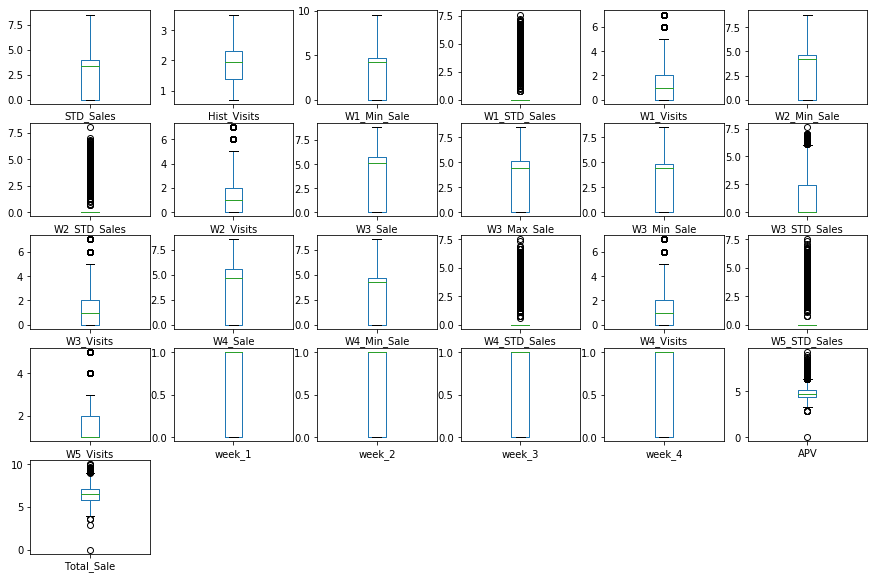

In [22]:
df1.plot(kind='box', subplots=True, layout=(5,6), sharex=False, sharey=False,fontsize=10, figsize = (15, 10))
plt.show()

### Conclusion:  Variables like W1_STD_Sales, W2_STD_Sales, W3_STD_Sales, W4_STD_Sales, W5_STD_Sales, APV have many outliers which can influence our decision making skills, so we need to take care of those outliers.

In [23]:
df1.drop(['W1_STD_Sales','W2_STD_Sales','W3_STD_Sales','W4_STD_Sales','W5_STD_Sales'],axis=1,inplace=True)
df1.columns

Index(['STD_Sales', 'Hist_Visits', 'W1_Min_Sale', 'W1_Visits', 'W2_Min_Sale',
       'W2_Visits', 'W3_Sale', 'W3_Max_Sale', 'W3_Min_Sale', 'W3_Visits',
       'W4_Sale', 'W4_Min_Sale', 'W4_Visits', 'W5_Visits', 'week_1', 'week_2',
       'week_3', 'week_4', 'APV', 'Visitors_Type', 'Total_Sale'],
      dtype='object')

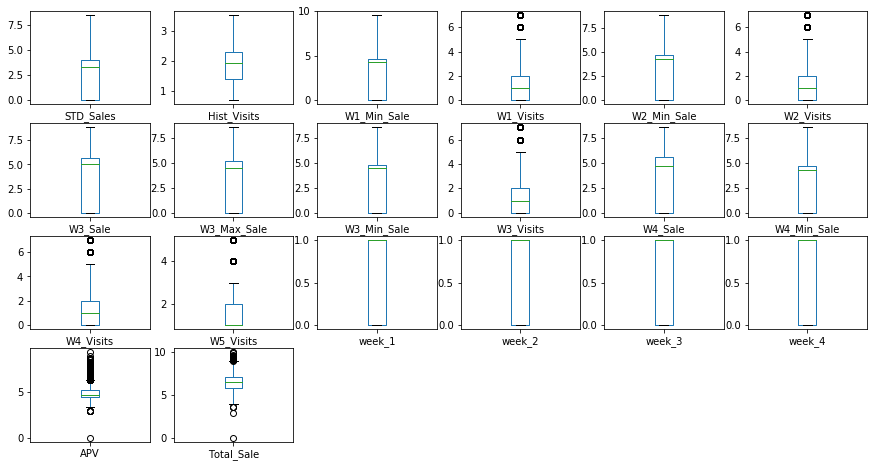

In [24]:
df1.plot(kind='box', subplots=True, layout=(5,6), sharex=False, sharey=False,fontsize=10, figsize = (15, 10))
plt.show()

### Conclusion: We are dropping variables which have extreme outliers, if we keep those variables and try to keep those variables by removing outliers, we have to loss nearly 50% of the observations. Boxplots looks nice after removing those variables.

# Removing Outliers

In [25]:
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
#print(IQR)

In [26]:
df2 = df1[~((df1 < (Q1 - 1.5 * IQR)) |(df1 > (Q3 + 1.5 * IQR))).any(axis=1)]

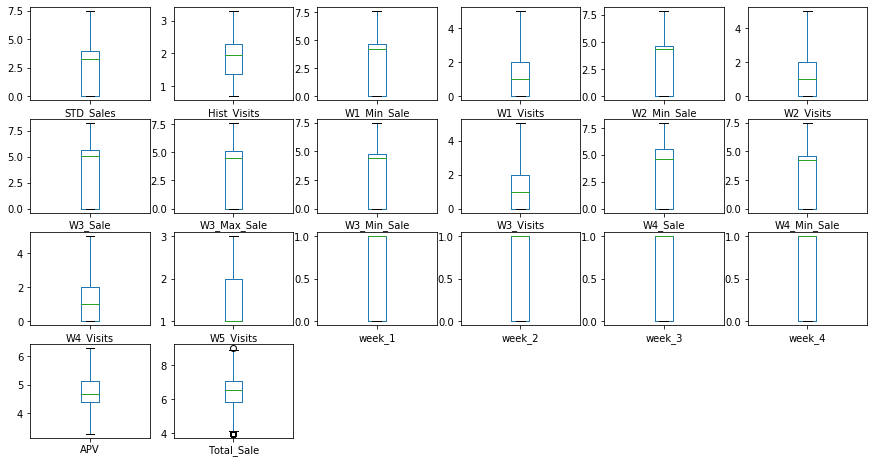

In [27]:
df2.plot(kind='box', subplots=True, layout=(5,6), sharex=False, sharey=False,fontsize=10, figsize = (15, 10))
plt.show()

In [28]:
# Before Removing outliers and variables
df1.shape

(73358, 21)

In [29]:
# After Removing outliers and variables
df2.shape

(70000, 21)

### Conclusion: We have remove extra outliers with less data loss, before we had 16,13,876‬ observations and now we have 13,99,800‬ observations, but this might give us better model.

# Check Multicollinearity Assumption after cleaning data

In [30]:
df2.corr(method='pearson')

,STD_Sales,Hist_Visits,W1_Min_Sale,W1_Visits,W2_Min_Sale,W2_Visits,W3_Sale,W3_Max_Sale,W3_Min_Sale,W3_Visits,W4_Sale,W4_Min_Sale,W4_Visits,W5_Visits,week_1,week_2,week_3,week_4,APV,Total_Sale
STD_Sales,1.000000,0.444776,0.298863,0.275222,0.286699,0.275904,0.359534,0.360425,0.316435,0.297528,0.356077,0.325810,0.292833,0.193923,0.287258,0.278695,0.305937,0.316025,0.349860,0.564456
Hist_Visits,0.444776,1.000000,0.591041,0.739553,0.592764,0.750217,0.701236,0.639906,0.595022,0.778805,0.692562,0.611681,0.746465,0.487404,0.628323,0.634508,0.640566,0.651563,0.036867,0.818088
W1_Min_Sale,0.298863,0.591041,1.000000,0.663634,0.355912,0.335124,0.412180,0.392625,0.380934,0.352823,0.357429,0.341814,0.298316,0.147841,0.977780,0.347544,0.364520,0.324956,0.218380,0.604453
W1_Visits,0.275222,0.739553,0.663634,1.000000,0.336943,0.521923,0.412088,0.363838,0.328104,0.520355,0.392198,0.330912,0.472160,0.316031,0.724975,0.370219,0.357607,0.354650,0.010551,0.582220
W2_Min_Sale,0.286699,0.592764,0.355912,0.336943,1.000000,0.653927,0.386366,0.368385,0.355245,0.344500,0.377908,0.363157,0.313057,0.153892,0.343658,0.976838,0.345203,0.348794,0.206758,0.600055
W2_Visits,0.275904,0.750217,0.335124,0.521923,0.653927,1.000000,0.405764,0.353838,0.320623,0.528859,0.406407,0.341442,0.498537,0.336178,0.364901,0.719729,0.356692,0.370656,-0.005175,0.579984
W3_Sale,0.359534,0.701236,0.412180,0.412088,0.386366,0.405764,1.000000,0.988484,0.968149,0.781113,0.415264,0.381930,0.393344,0.225482,0.407042,0.380149,0.967284,0.376434,0.208005,0.684111
W3_Max_Sale,0.360425,0.639906,0.392625,0.363838,0.368385,0.353838,0.988484,1.000000,0.986024,0.688197,0.388672,0.363170,0.340730,0.184760,0.381403,0.356646,0.973707,0.350987,0.235230,0.654993
W3_Min_Sale,0.316435,0.595022,0.380934,0.328104,0.355245,0.320623,0.968149,0.986024,1.000000,0.620668,0.363847,0.346312,0.303504,0.152498,0.366256,0.340658,0.972833,0.332377,0.230058,0.618824
W3_Visits,0.297528,0.778805,0.352823,0.520355,0.344500,0.528859,0.781113,0.688197,0.620668,1.000000,0.419657,0.351495,0.521456,0.355046,0.382344,0.374187,0.690688,0.381925,0.004685,0.610355


In [31]:
X=df2.loc[:, df2.columns != 'Total_Sale']
X = df2.drop(['Visitors_Type'], axis = 1)
# calling previously defined function
vif_cal(X,'Total_Sale')

 VIF score for STD_Sales is:- 1.71
 VIF score for Hist_Visits is:- 37.54
 VIF score for W1_Min_Sale is:- 45.18
 VIF score for W1_Visits is:- 4.27
 VIF score for W2_Min_Sale is:- 44.32
 VIF score for W2_Visits is:- 4.22
 VIF score for W3_Sale is:- 541.42
 VIF score for W3_Max_Sale is:- 289.42
 VIF score for W3_Min_Sale is:- 105.24
 VIF score for W3_Visits is:- 29.54
 VIF score for W4_Sale is:- 163.88
 VIF score for W4_Min_Sale is:- 126.45
 VIF score for W4_Visits is:- 15.77
 VIF score for W5_Visits is:- 1.88
 VIF score for week_1 is:- 50.73
 VIF score for week_2 is:- 50.45
 VIF score for week_3 is:- 51.11
 VIF score for week_4 is:- 51.59
 VIF score for APV is:- 3.91


In [32]:
X=df2.loc[:, df2.columns != 'Total_Sale']
X = df2.drop(['Visitors_Type','W3_Sale'], axis = 1)
# calling previously defined function
vif_cal(X,'Total_Sale')

 VIF score for STD_Sales is:- 1.69
 VIF score for Hist_Visits is:- 35.31
 VIF score for W1_Min_Sale is:- 44.78
 VIF score for W1_Visits is:- 4.21
 VIF score for W2_Min_Sale is:- 44.04
 VIF score for W2_Visits is:- 4.11
 VIF score for W3_Max_Sale is:- 70.52
 VIF score for W3_Min_Sale is:- 71.89
 VIF score for W3_Visits is:- 5.16
 VIF score for W4_Sale is:- 158.95
 VIF score for W4_Min_Sale is:- 122.76
 VIF score for W4_Visits is:- 15.05
 VIF score for W5_Visits is:- 1.84
 VIF score for week_1 is:- 50.39
 VIF score for week_2 is:- 50.28
 VIF score for week_3 is:- 48.96
 VIF score for week_4 is:- 50.81
 VIF score for APV is:- 3.96


In [33]:
X=df2.loc[:, df2.columns != 'Total_Sale']
X = df2.drop(['Visitors_Type','W3_Sale','W4_Min_Sale'], axis = 1)
# calling previously defined function
vif_cal(X,'Total_Sale')

 VIF score for STD_Sales is:- 1.67
 VIF score for Hist_Visits is:- 34.95
 VIF score for W1_Min_Sale is:- 44.98
 VIF score for W1_Visits is:- 4.18
 VIF score for W2_Min_Sale is:- 43.82
 VIF score for W2_Visits is:- 4.08
 VIF score for W3_Max_Sale is:- 69.94
 VIF score for W3_Min_Sale is:- 71.54
 VIF score for W3_Visits is:- 5.1
 VIF score for W4_Sale is:- 56.15
 VIF score for W4_Visits is:- 6.25
 VIF score for W5_Visits is:- 1.84
 VIF score for week_1 is:- 50.78
 VIF score for week_2 is:- 50.03
 VIF score for week_3 is:- 49.31
 VIF score for week_4 is:- 40.03
 VIF score for APV is:- 3.9


In [34]:
X=df2.loc[:, df2.columns != 'Total_Sale']
X = df2.drop(['Visitors_Type','W3_Sale','W4_Min_Sale','W3_Min_Sale'], axis = 1)
# calling previously defined function
vif_cal(X,'Total_Sale')

 VIF score for STD_Sales is:- 1.59
 VIF score for Hist_Visits is:- 34.64
 VIF score for W1_Min_Sale is:- 44.25
 VIF score for W1_Visits is:- 4.17
 VIF score for W2_Min_Sale is:- 43.02
 VIF score for W2_Visits is:- 4.09
 VIF score for W3_Max_Sale is:- 38.76
 VIF score for W3_Visits is:- 4.19
 VIF score for W4_Sale is:- 55.58
 VIF score for W4_Visits is:- 6.23
 VIF score for W5_Visits is:- 1.83
 VIF score for week_1 is:- 50.01
 VIF score for week_2 is:- 49.22
 VIF score for week_3 is:- 37.09
 VIF score for week_4 is:- 39.73
 VIF score for APV is:- 3.81


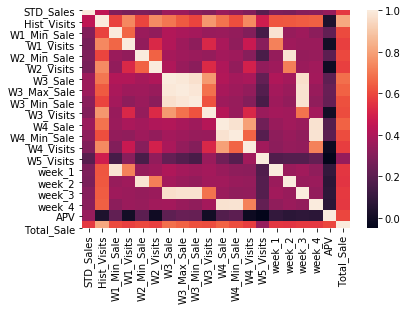

In [35]:
cols=df2.columns
correlations=df2[cols].corr()
sns.heatmap(correlations)

# Linearity Assumption

C:\Users\parsi\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\parsi\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


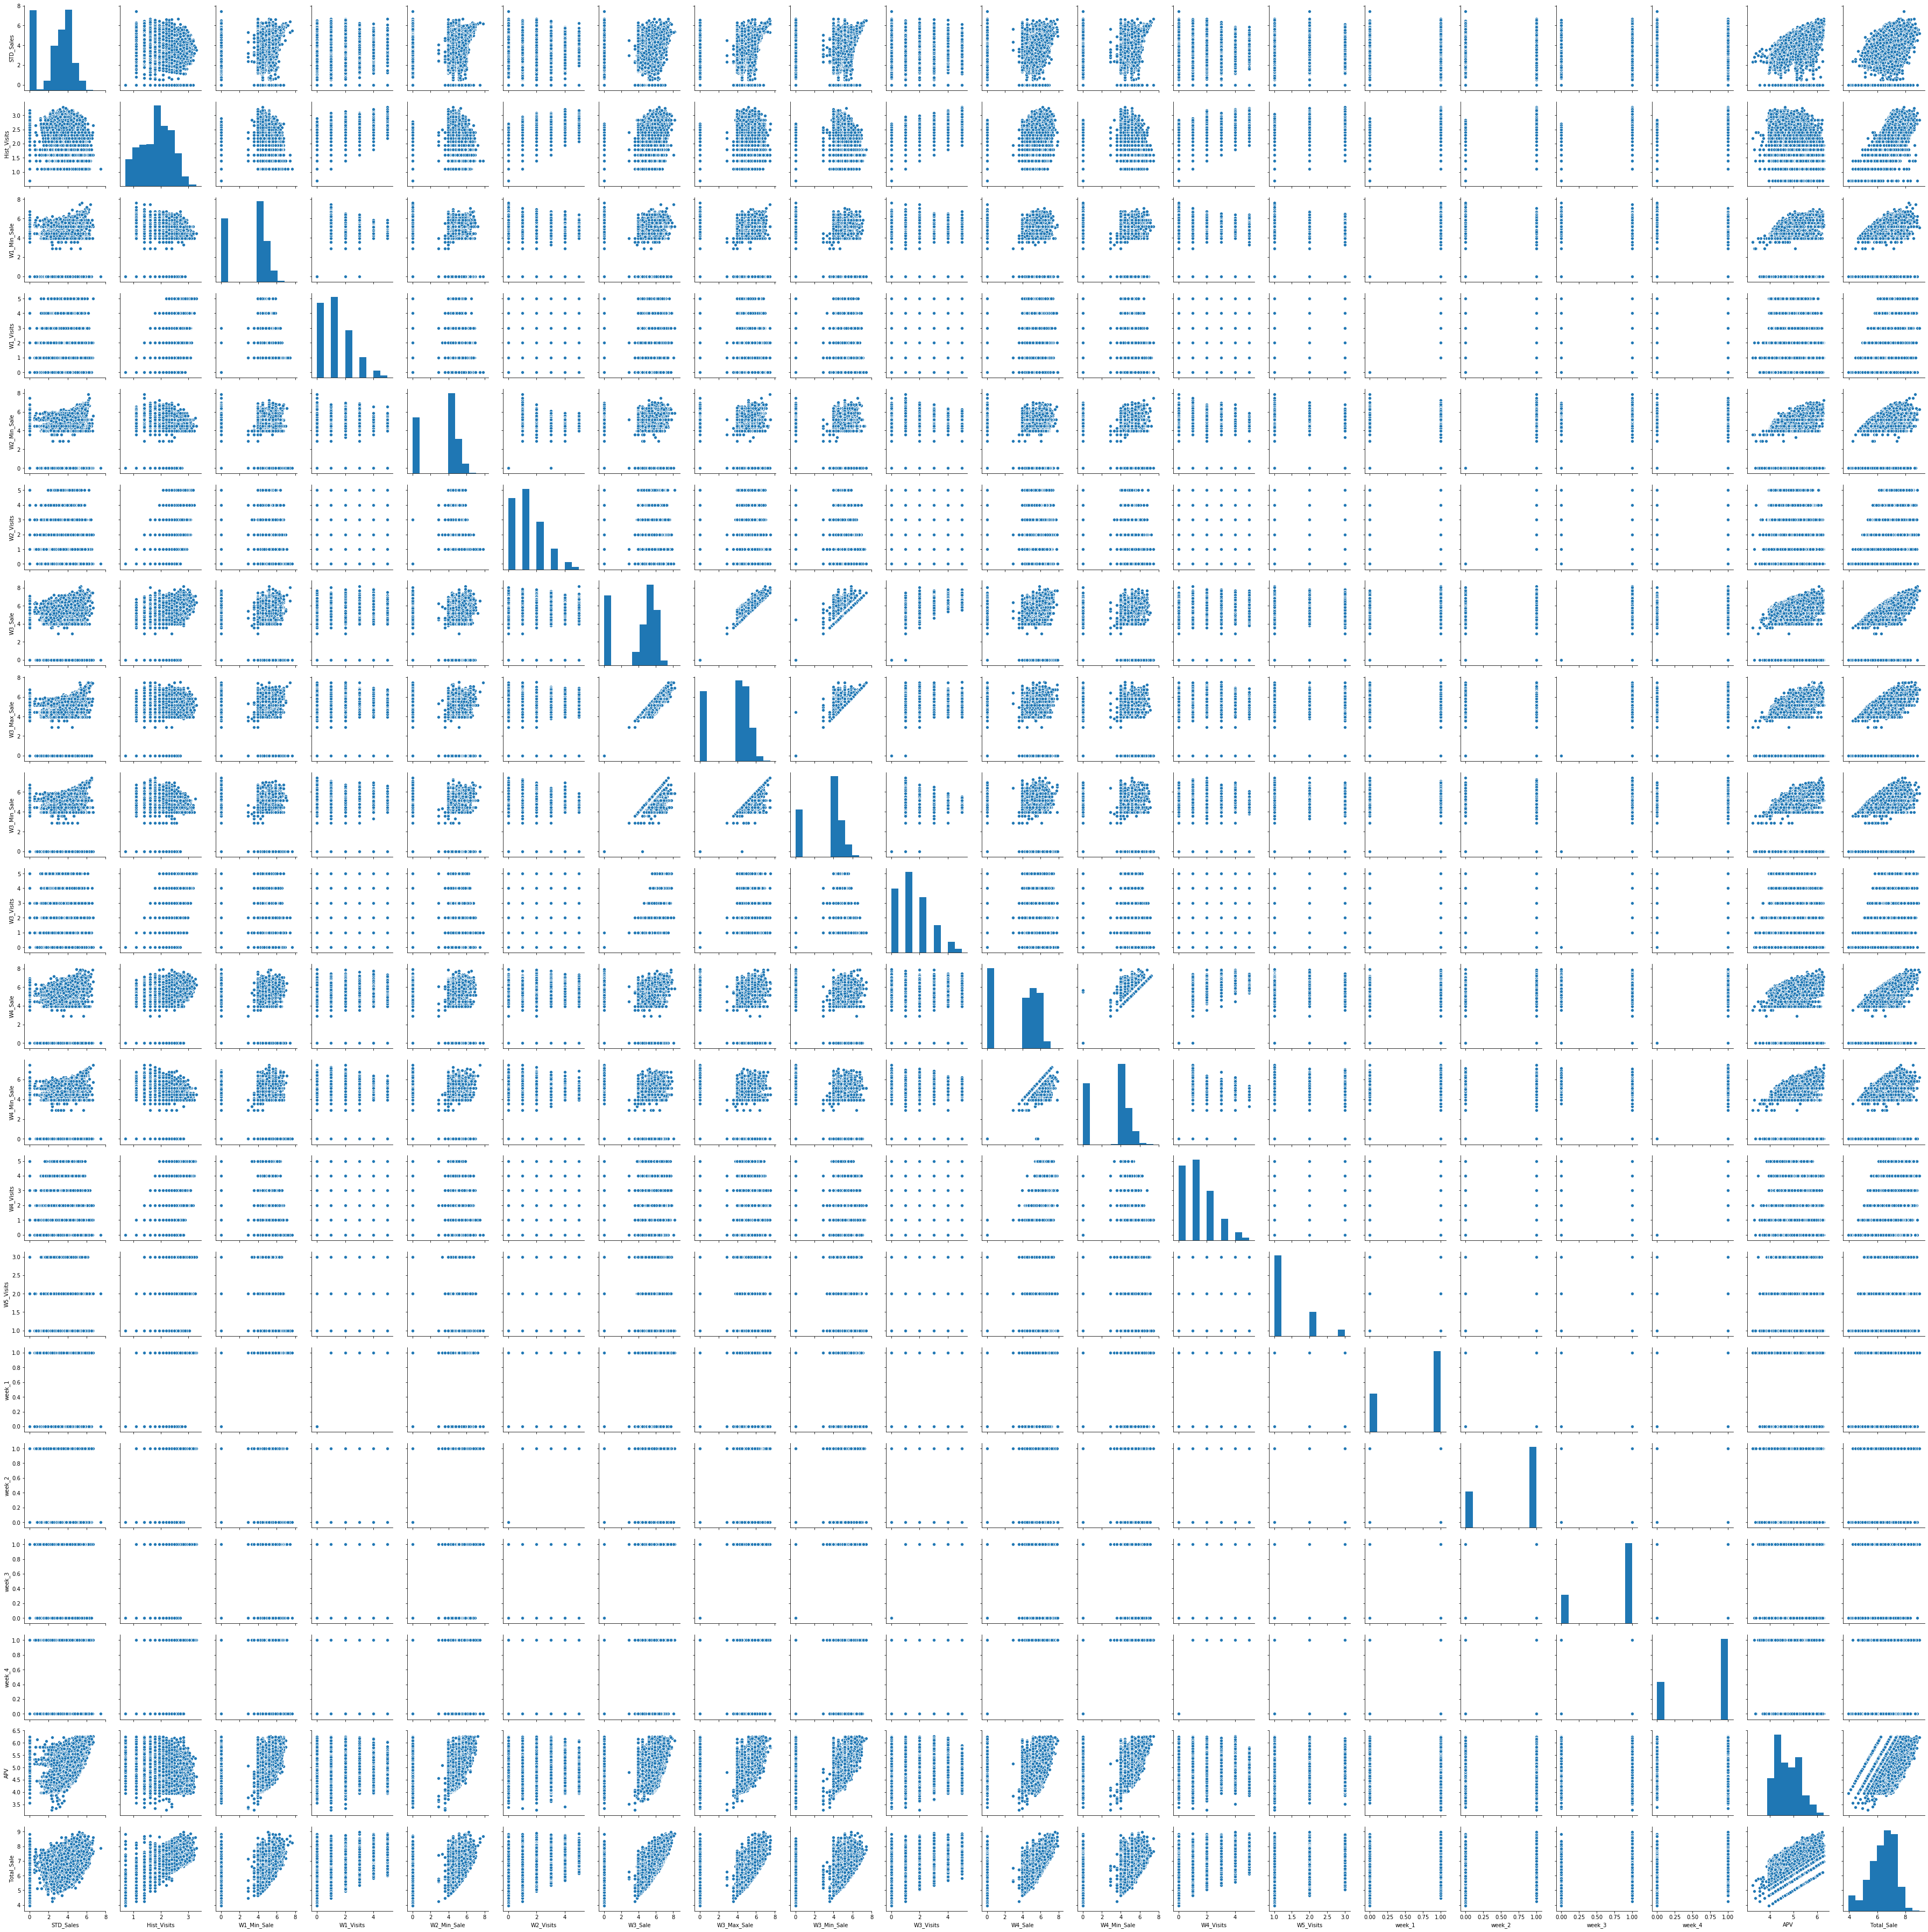

In [36]:
sns.pairplot(df2)
plt.show()

# Normality Assumptions

# Density Plot

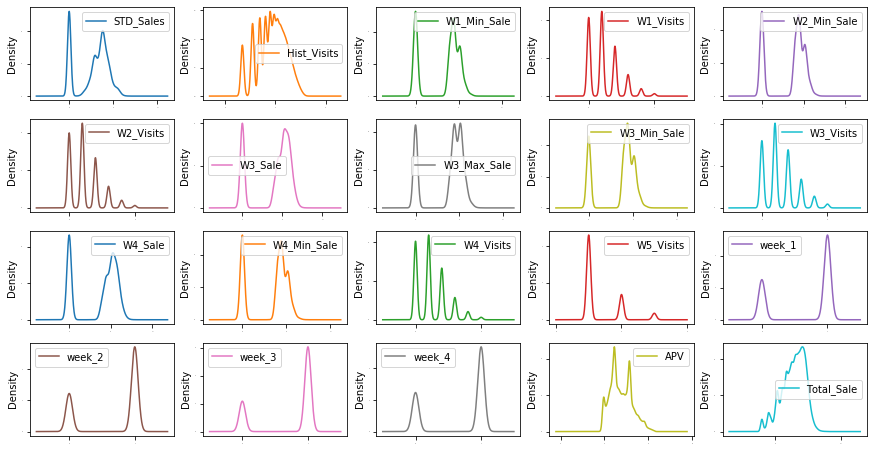

In [37]:
df2.plot(kind='density', subplots=True, layout=(6,5), sharex=False, legend=True, fontsize=1, figsize=(15,12))
plt.show()

# Histogram 

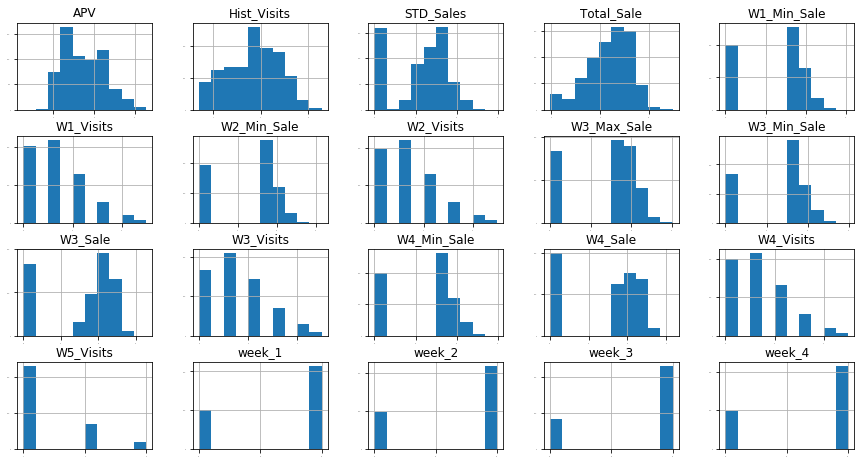

In [38]:
# to plot histograms (to check distribution of variables) of all the variables in a dataframe
df2.hist(sharex=False, sharey=False, xlabelsize=1, layout=(6,5), ylabelsize=1, figsize =(15,12) )
plt.show()

In [35]:
# converting qualitative variable to categorical/qualitative type
# df2.week_1 =df2.week_1.astype('category')
# df2.week_2 =df2.week_2.astype('category')
# df2.week_2 =df2.week_2.astype('category')
# df2.week_3 =df2.week_3.astype('category')
# df2.week_4 =df2.week_4.astype('category')

In [36]:
df2.W5_Visits.unique()

array([ 1., nan,  2.,  3.])

In [37]:
df2.columns

Index(['STD_Sales', 'Hist_Visits', 'W1_Min_Sale', 'W1_Visits', 'W2_Min_Sale',
       'W2_Visits', 'W3_Sale', 'W3_Max_Sale', 'W3_Min_Sale', 'W3_Visits',
       'W4_Sale', 'W4_Min_Sale', 'W4_Visits', 'W5_Visits', 'week_1', 'week_2',
       'week_3', 'week_4', 'APV', 'Visitors_Type', 'Total_Sale'],
      dtype='object')

# Missing Value imputation

In [39]:
df2.isna().sum()

STD_Sales        7106
Hist_Visits      6942
W1_Min_Sale      6969
W1_Visits        7038
W2_Min_Sale      7026
W2_Visits        7041
W3_Sale          7084
W3_Max_Sale      6900
W3_Min_Sale      6847
W3_Visits        7002
W4_Sale          7023
W4_Min_Sale      6957
W4_Visits        7018
W5_Visits        6985
week_1           6886
week_2           6927
week_3           6950
week_4           6982
APV              6986
Visitors_Type    7029
Total_Sale          0
dtype: int64

### Heatmap of null values

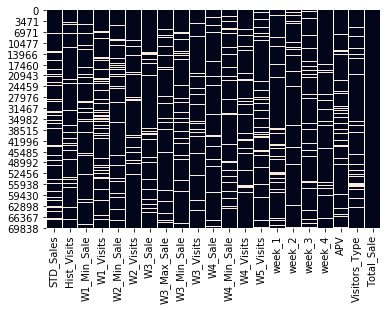

In [40]:
sns.heatmap(df2.isnull(), cbar = False)
plt.show()

### Fisrt we handle APV colums we use mean and handle Nan value

In [41]:
df2['APV'].fillna((df2['APV'].mean()), inplace=True)

C:\Users\parsi\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [42]:
df2.isna().sum()

STD_Sales        7106
Hist_Visits      6942
W1_Min_Sale      6969
W1_Visits        7038
W2_Min_Sale      7026
W2_Visits        7041
W3_Sale          7084
W3_Max_Sale      6900
W3_Min_Sale      6847
W3_Visits        7002
W4_Sale          7023
W4_Min_Sale      6957
W4_Visits        7018
W5_Visits        6985
week_1           6886
week_2           6927
week_3           6950
week_4           6982
APV                 0
Visitors_Type    7029
Total_Sale          0
dtype: int64

### Second we handle 'week_1', 'week_2', 'week_3', 'week_4'

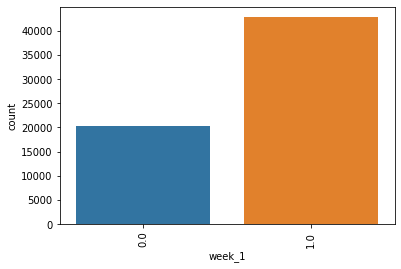

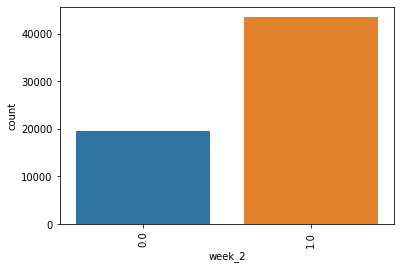

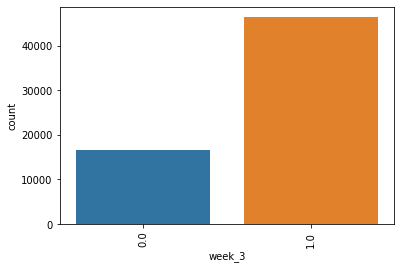

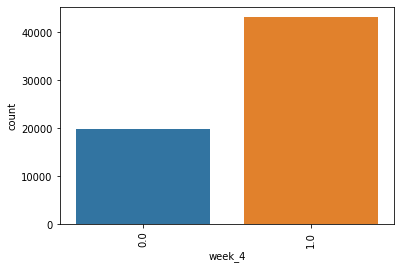

In [43]:
# now we can see all the nan values is fill properly
sns.countplot(data = df2, x = "week_1")
plt.xticks(rotation =90)
plt.show()
sns.countplot(data = df2, x = "week_2")
plt.xticks(rotation =90)
plt.show()
sns.countplot(data = df2, x = "week_3")
plt.xticks(rotation =90)
plt.show()
sns.countplot(data = df2, x = "week_4")
plt.xticks(rotation =90)
plt.show()

In [44]:
one_count = 45000*100/69986
print ("One Count: ",one_count)
print ("Zero Count: ",100-one_count)

One Count:  64.29857400051439
Zero Count:  35.70142599948561


### Conclusion: here we can analyse from four weeks value 0 covers the 35.69% part and value 1 covers 64.30% part, Including that we have null values.

In [44]:
print("week_1: ",df2.week_1.notna().sum())
print("week_1: ",df2.week_1.isna().sum())
print(df2.week_2.isna().sum())
print(df2.week_3.isna().sum())
print(df2.week_4.isna().sum())

week_1:  63089
week_1:  6875
7111
6918
6916


In [45]:
weeks=['week_1','week_2','week_3','week_4']
for i in range(len(weeks)):
    week_nan_values=df2[weeks[i]].isna().sum()
    w_33_0=round(week_nan_values*35.69/100)
    count=1
    for j in df2.index.values:
        if(count<=w_33_0 and pd.isna(df2[weeks[i]][j])):
            df2[weeks[i]][j]=0
            count=count+1
        elif(pd.isna(df2[weeks[i]][j])):
            df2[weeks[i]][j]=1        

C:\Users\parsi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\parsi\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\parsi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

In [46]:
print(df2.week_1.isna().sum())
print(df2.week_2.isna().sum())
print(df2.week_3.isna().sum())
print(df2.week_4.isna().sum())

0
0
0
0


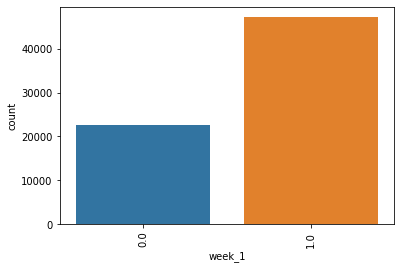

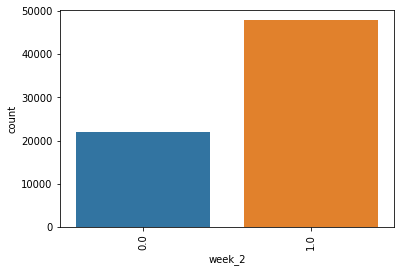

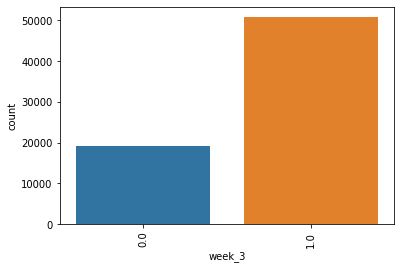

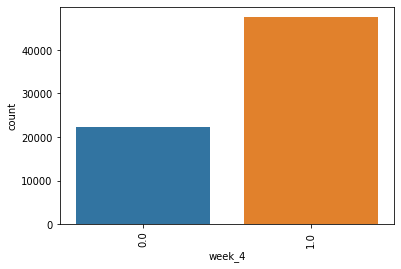

In [47]:
# now we can see all the nan values is fill properly
sns.countplot(data = df2, x = "week_1")
plt.xticks(rotation =90)
plt.show()
sns.countplot(data = df2, x = "week_2")
plt.xticks(rotation =90)
plt.show()
sns.countplot(data = df2, x = "week_3")
plt.xticks(rotation =90)
plt.show()
sns.countplot(data = df2, x = "week_4")
plt.xticks(rotation =90)
plt.show()

### Imputing random values on variables 'W1_Visits', 'W2_Visits', 'W3_Visits, 'W4_Visits', 'W5_Visits'

In [48]:
visits=['W1_Visits','W2_Visits','W3_Visits','W4_Visits','W5_Visits']
for i in range(3):
    for i in range(len(visits)):
        for j in df2.index.values:
            if (pd.isnull(df2[visits[i]][j]) or pd.isna(df2[visits[i]][j])):
                value=(random.choice(df2[visits[i]].values.tolist()))
                df2[visits[i]][j] = value
            else:
                pass

C:\Users\parsi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [49]:
print(df2.W1_Visits.isna().sum())
print(df2.W2_Visits.isna().sum())
print(df2.W3_Visits.isna().sum())
print(df2.W4_Visits.isna().sum())
print(df2.W5_Visits.isna().sum())

0
0
0
0
0


In [50]:
df2.isnull().sum()

STD_Sales        6990
Hist_Visits      7070
W1_Min_Sale      7043
W1_Visits           0
W2_Min_Sale      7045
W2_Visits           0
W3_Sale          7019
W3_Max_Sale      6816
W3_Min_Sale      6879
W3_Visits           0
W4_Sale          7002
W4_Min_Sale      7096
W4_Visits           0
W5_Visits           0
week_1              0
week_2              0
week_3              0
week_4              0
APV                 0
Visitors_Type    6955
Total_Sale          0
dtype: int64

In [51]:
sales=['W3_Sale','W4_Sale','W1_Min_Sale','W2_Min_Sale','W3_Min_Sale','W4_Min_Sale','W3_Max_Sale','STD_Sales','Hist_Visits']
for i in range(3):
    for i in range(len(sales)):
        for j in df2.index.values:
            if(pd.isnull(df2[sales[i]][j] or pd.isna(df2[sales[i]][j]))):
                value=(random.choice(df2[sales[i]].values.tolist()))
                df2[sales[i]][j] = value
            else:
                pass   

C:\Users\parsi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [53]:
df2.isnull().sum()

STD_Sales           0
Hist_Visits         0
W1_Min_Sale         0
W1_Visits           0
W2_Min_Sale         0
W2_Visits           0
W3_Sale             0
W3_Max_Sale         0
W3_Min_Sale         0
W3_Visits           0
W4_Sale             0
W4_Min_Sale         0
W4_Visits           0
W5_Visits           0
week_1              0
week_2              0
week_3              0
week_4              0
APV                 0
Visitors_Type    6955
Total_Sale          0
dtype: int64

### Impute the values using scikit-learn SimpleImpute Class

In [54]:
df2.Visitors_Type.value_counts()

Regular_Visitors    58335
Rare_Visitor         4393
Frequent_Visitor      281
Name: Visitors_Type, dtype: int64

In [55]:
imp_mean = SimpleImputer( strategy='most_frequent')
imp_mean.fit(df2[['Visitors_Type']])
df2[['Visitors_Type']] = imp_mean.transform(df2[['Visitors_Type']])

C:\Users\parsi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\parsi\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [56]:
df2.isnull().sum()

STD_Sales        0
Hist_Visits      0
W1_Min_Sale      0
W1_Visits        0
W2_Min_Sale      0
W2_Visits        0
W3_Sale          0
W3_Max_Sale      0
W3_Min_Sale      0
W3_Visits        0
W4_Sale          0
W4_Min_Sale      0
W4_Visits        0
W5_Visits        0
week_1           0
week_2           0
week_3           0
week_4           0
APV              0
Visitors_Type    0
Total_Sale       0
dtype: int64

In [57]:
df2.head()

,STD_Sales,Hist_Visits,W1_Min_Sale,W1_Visits,W2_Min_Sale,W2_Visits,W3_Sale,W3_Max_Sale,W3_Min_Sale,W3_Visits,...,W4_Min_Sale,W4_Visits,W5_Visits,week_1,week_2,week_3,week_4,APV,Visitors_Type,Total_Sale
0,3.988061,2.708050,4.241039,1.0,4.926964,3.0,5.148657,5.552184,4.461300,4.0,...,4.461300,2.0,1.0,1.0,1.0,1.0,1.0,4.953208,Regular_Visitors,7.585687
1,3.163263,2.302585,3.958143,1.0,3.958143,1.0,5.043941,3.958143,3.958143,3.0,...,3.958143,2.0,1.0,1.0,1.0,1.0,1.0,4.155335,Regular_Visitors,6.338523
2,3.755802,1.386294,0.000000,0.0,3.958143,1.0,3.958143,3.958143,3.958143,1.0,...,0.000000,1.0,1.0,0.0,1.0,1.0,0.0,3.958143,Regular_Visitors,5.043941
3,3.670753,1.791759,5.148657,1.0,5.148657,1.0,4.461300,4.461300,4.461300,1.0,...,5.148657,1.0,3.0,1.0,1.0,1.0,1.0,5.043941,Regular_Visitors,6.648207
4,0.000000,1.098612,5.148657,1.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,4.461300,0.0,1.0,1.0,0.0,0.0,0.0,5.148657,Regular_Visitors,5.838896


# One Hot Encoding on categorical Visitors_Type variable

In [58]:
df3 = pd.get_dummies(df2, columns=["Visitors_Type"], prefix=["Type_is"] )
df3.head()

,STD_Sales,Hist_Visits,W1_Min_Sale,W1_Visits,W2_Min_Sale,W2_Visits,W3_Sale,W3_Max_Sale,W3_Min_Sale,W3_Visits,...,W5_Visits,week_1,week_2,week_3,week_4,APV,Total_Sale,Type_is_Frequent_Visitor,Type_is_Rare_Visitor,Type_is_Regular_Visitors
0,3.988061,2.708050,4.241039,1.0,4.926964,3.0,5.148657,5.552184,4.461300,4.0,...,1.0,1.0,1.0,1.0,1.0,4.953208,7.585687,0,0,1
1,3.163263,2.302585,3.958143,1.0,3.958143,1.0,5.043941,3.958143,3.958143,3.0,...,1.0,1.0,1.0,1.0,1.0,4.155335,6.338523,0,0,1
2,3.755802,1.386294,0.000000,0.0,3.958143,1.0,3.958143,3.958143,3.958143,1.0,...,1.0,0.0,1.0,1.0,0.0,3.958143,5.043941,0,0,1
3,3.670753,1.791759,5.148657,1.0,5.148657,1.0,4.461300,4.461300,4.461300,1.0,...,3.0,1.0,1.0,1.0,1.0,5.043941,6.648207,0,0,1
4,0.000000,1.098612,5.148657,1.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,1.0,1.0,0.0,0.0,0.0,5.148657,5.838896,0,0,1


In [59]:
df3.columns

Index(['STD_Sales', 'Hist_Visits', 'W1_Min_Sale', 'W1_Visits', 'W2_Min_Sale',
       'W2_Visits', 'W3_Sale', 'W3_Max_Sale', 'W3_Min_Sale', 'W3_Visits',
       'W4_Sale', 'W4_Min_Sale', 'W4_Visits', 'W5_Visits', 'week_1', 'week_2',
       'week_3', 'week_4', 'APV', 'Total_Sale', 'Type_is_Frequent_Visitor',
       'Type_is_Rare_Visitor', 'Type_is_Regular_Visitors'],
      dtype='object')

# Check Normality of dependent Variable by QQ Plot

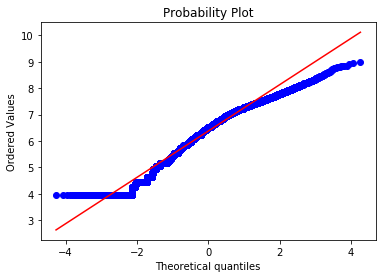

In [60]:
#Get also the QQ-plot
from scipy import stats
import matplotlib.pyplot as plt
fig = plt.figure()
res = stats.probplot(df3['Total_Sale'], plot=plt)
plt.show()

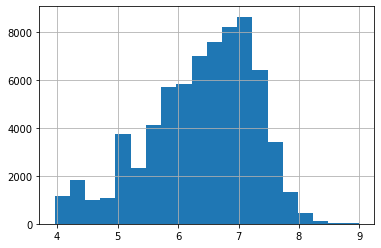

In [61]:
df3.Total_Sale.hist(bins = 20) # Default beans is 10
plt.show()

### Conclusion: From the graph, we can conclude that the dependent variable is slightly negatively skewed.

# Splitting the Dataset into Train and Test Set

In [62]:
X_new = df3.drop(['Total_Sale'], axis = 1).as_matrix()
y_new = df3.Total_Sale
x_train , x_test , y_train , y_test = train_test_split(X_new, y_new, test_size = 0.3 , random_state = 10)

In [63]:
x_train.shape , x_test.shape

((48974, 22), (20990, 22))

In [64]:
#from sklearn.model_selection import train_test_split
seed = 10
test_size = 0.25
trainingSet, testingSet = train_test_split(df, test_size = test_size, random_state = seed)

In [65]:
trainingSet.shape

(55018, 30)

# Model Building

### Linear Regression

In [66]:
# Importing the libraries
def LinearRegression():
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import mean_squared_error, r2_score
    from sklearn.metrics import mean_squared_error as mse
    
    #Model fitting on training set
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    
    
    #prediction for train test and test test
    y_pred_train = lr.predict(x_train)
    y_pred_test = lr.predict(x_test)
    
    #Training and Testing MSE and RMSE
    train_mse = np.mean((y_train - lr.predict(x_train)) ** 2)
    test_mse = np.mean((y_test - lr.predict(x_test))** 2)
    print('   Linear   Regression    ')
    print("Train MSE is",train_mse)
    print("Test MSE is",test_mse)
    print("Train RMSE is:",np.sqrt(train_mse))
    print("Test RMSE is",np.sqrt(test_mse))
    
    
    #r2 Score value
    r2 = r2_score(y_test,y_pred_test)
    print("r2 score is",r2)
    print('   Linear   Regression    ')
    print()
    
    #Plotting Residual Plot
    residual=y_train-y_pred_train
    residual=residual.values.reshape(len(residual),1)
    plt.scatter(y_train,residual,c = "red")
    plt.xlabel("residual")
    plt.ylabel("y_test")
    plt.axhline(y = 0)
    
    #Checming Normality Condition
    import scipy as sp
    fig, ax = plt.subplots(figsize=(6,3))
    _, (__, ___, r) = sp.stats.probplot(residual.reshape((len(residual),)), plot=ax, fit=True)

   Linear   Regression    
Train MSE is 0.04797311132882546
Test MSE is 0.051151981797685195
Train RMSE is: 0.2190276496902285
Test RMSE is 0.2261680388509508
r2 score is 0.9357099514605262
   Linear   Regression    

None


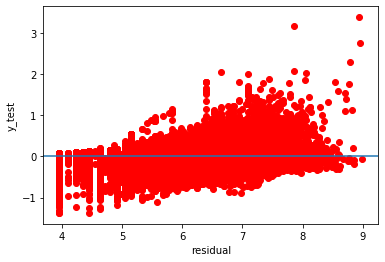

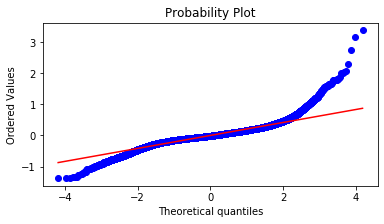

In [67]:
print(LinearRegression())

### Ridge Regression

In [68]:
# Ridge Regression
def Ridge_Regression():
    from sklearn.linear_model import Ridge
    from sklearn.metrics import mean_squared_error, r2_score
    from sklearn.metrics import mean_squared_error as mse
    import seaborn as sns
    import matplotlib.pyplot as plt
    
    #Model fitting on training set
    ridge = Ridge(alpha=0.05)
    ridge.fit(x_train,y_train)
    
    
    #prediction for train test and test test
    y_pred_train = ridge.predict(x_train)
    y_pred_test = ridge.predict(x_test)
    
    #Training and Testing MSE and RMSE
    train_mse = np.mean((y_train - ridge.predict(x_train)) ** 2)
    test_mse = np.mean((y_test - ridge.predict(x_test))** 2)
    print('       Ridge_Regression         ')
    print("Train MSE is",train_mse)
    print("Test MSE is",test_mse)
    print("Train RMSE is:",np.sqrt(train_mse))
    print("Test RMSE is",np.sqrt(test_mse))
    
    
    #r2 Score value
    r2 = r2_score(y_test,y_pred_test)
    print("r2 score is",r2)
    print('       Ridge_Regression         ')
    print()
    
    #Plotting Residual Plot
    residual=y_train-y_pred_train
    residual=residual.values.reshape(len(residual),1)
    plt.scatter(y_train,residual,c = "red")
    plt.xlabel("residual")
    plt.ylabel("y_test")
    plt.axhline(y = 0)
    
    #Checming Normality Condition
    import scipy as sp
    fig, ax = plt.subplots(figsize=(6,3))
    _, (__, ___, r) = sp.stats.probplot(residual.reshape((len(residual),)), plot=ax, fit=True)
    

       Ridge_Regression         
Train MSE is 0.0479731113402101
Test MSE is 0.05115196250303438
Train RMSE is: 0.21902764971621758
Test RMSE is 0.2261679961953821
r2 score is 0.9357099757108874
       Ridge_Regression         

None


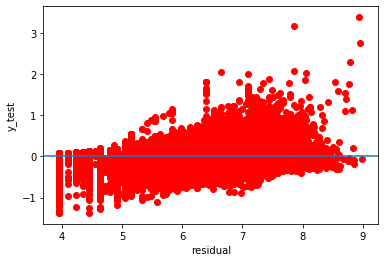

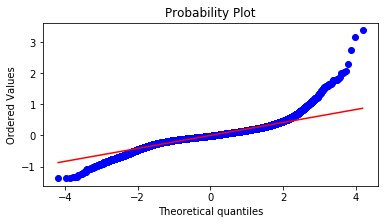

In [69]:
print(Ridge_Regression())

### Lasso Regression

In [70]:
# Lasso Regression
def Lasso_Regression():
    from sklearn.linear_model import Lasso
    from sklearn.metrics import mean_squared_error, r2_score
    from sklearn.metrics import mean_squared_error as mse
    
    #Model fitting on training set
    lasso = Lasso(alpha=0.05)
    lasso.fit(x_train,y_train)
    
    
    #prediction for train test and test test
    y_pred_train = lasso.predict(x_train)
    y_pred_test = lasso.predict(x_test)
    
    #Training and Testing MSE and RMSE
    train_mse = np.mean((y_train - lasso.predict(x_train)) ** 2)
    test_mse = np.mean((y_test - lasso.predict(x_test))** 2)
    print('       Lasso_Regression         ')
    print("Train MSE is",train_mse)
    print("Test MSE is",test_mse)
    print("Train RMSE is:",np.sqrt(train_mse))
    print("Test RMSE is",np.sqrt(test_mse))
    
    
    #r2 Score value
    r2 = r2_score(y_test,y_pred_test)
    print("r2 score is",r2)
    
    #Plotting Residual Plot
    print('       Lasso_Regression         ')
    residual=y_train-y_pred_train
    residual=residual.values.reshape(len(residual),1)
    plt.scatter(y_train,residual,c = "red")
    plt.xlabel("residual")
    plt.ylabel("y_test")
    plt.axhline(y = 0)
    
    #Checming Normality Condition
    import scipy as sp
    fig, ax = plt.subplots(figsize=(6,3))
    _, (__, ___, r) = sp.stats.probplot(residual.reshape((len(residual),)), plot=ax, fit=True)

       Lasso_Regression         
Train MSE is 0.08948914177651328
Test MSE is 0.09358995354791139
Train RMSE is: 0.2991473579634513
Test RMSE is 0.3059247514470043
r2 score is 0.8823720519724894
       Lasso_Regression         
None


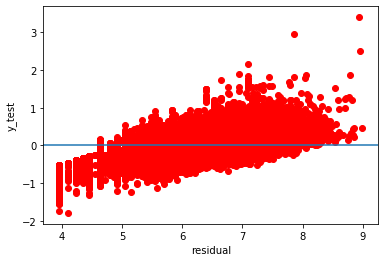

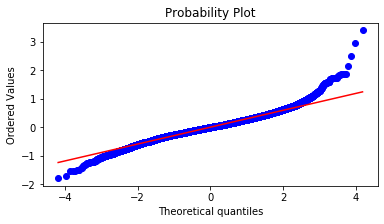

In [71]:
print(Lasso_Regression())

### Decision_Tree

In [72]:
def Decision_Tree():
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.metrics import mean_squared_error, r2_score
    
    
    #Model fitting on training set
    reg = DecisionTreeRegressor(criterion="mse",max_depth=4,random_state=10)
    reg.fit(x_train,y_train)
    
    #prediction for train test and test test
    y_pred_train = reg.predict(x_train)
    y_pred_test = reg.predict(x_test)
    
    #Training and Testing MSE and RMSE
    train_mse = np.mean((y_train - reg.predict(x_train)) ** 2)
    test_mse = np.mean((y_test - reg.predict(x_test))** 2)
    print('               Decision_Tree        ')
    print("Train MSE is",train_mse)
    print("Test MSE is",test_mse)
    print("Train RMSE is:",np.sqrt(train_mse))
    print("Test RMSE is",np.sqrt(test_mse))
    
    
    #r2 Score value
    r2 = r2_score(y_test,y_pred_test)
    print("r2 score is",r2)
    
    print('               Decision_Tree        ')
    #Plotting Residual Plot
    residual=y_train-y_pred_train
    residual=residual.values.reshape(len(residual),1)
    plt.scatter(y_train,residual,c = "red")
    plt.xlabel("residual")
    plt.ylabel("y_test")
    plt.axhline(y = 0)
    #Checming Normality Condition
    import scipy as sp
    fig, ax = plt.subplots(figsize=(6,3))
    _, (__, ___, r) = sp.stats.probplot(residual.reshape((len(residual),)), plot=ax, fit=True)

               Decision_Tree        
Train MSE is 0.17010948861468259
Test MSE is 0.1726718467729216
Train RMSE is: 0.4124433156382615
Test RMSE is 0.4155380208511871
r2 score is 0.7829784688628784
               Decision_Tree        
None


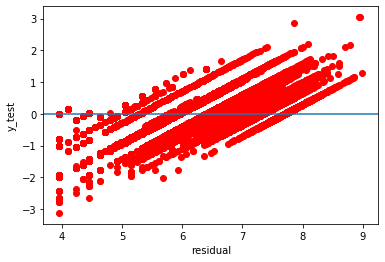

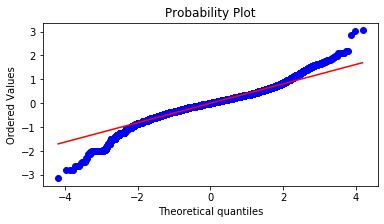

In [73]:
print(Decision_Tree())

### RandomForest_Regressor

In [74]:
def RandomForest_Regressor():
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.metrics import mean_squared_error, r2_score
    
    #Model fitting on training set
    rm = RandomForestRegressor(random_state=10)
    rm.fit(x_train,y_train)
    
    #prediction for train test and test test
    y_pred_train = rm.predict(x_train)
    y_pred_test = rm.predict(x_test)
    
    #Training and Testing MSE and RMSE
    train_mse = np.mean((y_train - rm.predict(x_train)) ** 2)
    test_mse = np.mean((y_test - rm.predict(x_test))** 2)
    print('       RandomForest Regressor          ')
    print("Train MSE is",train_mse)
    print("Test MSE is",test_mse)
    print("Train RMSE is:",np.sqrt(train_mse))
    print("Test RMSE is",np.sqrt(test_mse))
    
    
    #r2 Score value
    r2 = r2_score(y_test,y_pred_test)
    print("r2 score is",r2)
    
    print('       RandomForest Regressor          ')

    #Plotting Residual Plot
    residual=y_train-y_pred_train
    residual=residual.values.reshape(len(residual),1)
    plt.scatter(y_train,residual,c = "red")
    plt.xlabel("residual")
    plt.ylabel("y_test")
    plt.axhline(y = 0)
    #Checming Normality Condition
    import scipy as sp
    fig, ax = plt.subplots(figsize=(6,3))
    _, (__, ___, r) = sp.stats.probplot(residual.reshape((len(residual),)), plot=ax, fit=True)

       RandomForest Regressor          
Train MSE is 0.004215790064525162
Test MSE is 0.024187884745146777
Train RMSE is: 0.0649291156918463
Test RMSE is 0.155524547082275
r2 score is 0.9695996082716182
       RandomForest Regressor          
None


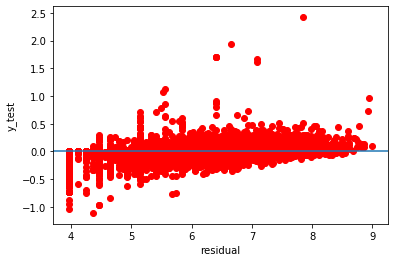

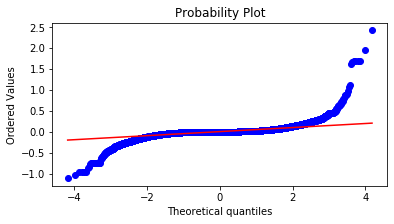

In [75]:
print(RandomForest_Regressor())

### KNN

In [76]:
def KNN():
    from sklearn.neighbors import KNeighborsRegressor
    from sklearn.metrics import mean_squared_error, r2_score
    
    #Model fitting on training set
    neigh = KNeighborsRegressor(n_neighbors=3)
    neigh.fit(x_train,y_train)
    
    #prediction for train test and test test
    y_pred_train = neigh.predict(x_train)
    y_pred_test = neigh.predict(x_test)
    
    #Training and Testing MSE and RMSE
    train_mse = np.mean((y_train - neigh.predict(x_train)) ** 2)
    test_mse = np.mean((y_test - neigh.predict(x_test))** 2)
    print('       KNearest Neighbor         ')
    print("Train MSE is",train_mse)
    print("Test MSE is",test_mse)
    print("Train RMSE is:",np.sqrt(train_mse))
    print("Test RMSE is",np.sqrt(test_mse))
    
    
    #r2 Score value
    r2 = r2_score(y_test,y_pred_test)
    print("r2 score is",r2)
    print('       KNearest Neighbor         ')
    
    #Plotting Residual Plot
    residual=y_train-y_pred_train
    residual=residual.values.reshape(len(residual),1)
    plt.scatter(y_train,residual,c = "red")
    plt.xlabel("residual")
    plt.ylabel("y_test")
    plt.axhline(y = 0)
    
    #Checming Normality Condition
    import scipy as sp
    fig, ax = plt.subplots(figsize=(6,3))
    _, (__, ___, r) = sp.stats.probplot(residual.reshape((len(residual),)), plot=ax, fit=True)
    

       KNearest Neighbor         
Train MSE is 0.029057960030447
Test MSE is 0.06183991556152094
Train RMSE is: 0.17046395522352226
Test RMSE is 0.24867632690210167
r2 score is 0.9222768887263907
       KNearest Neighbor         
None


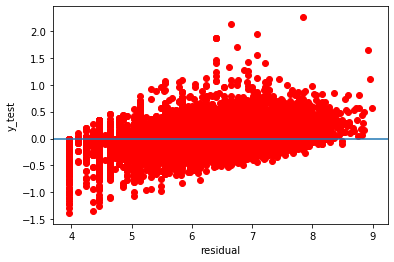

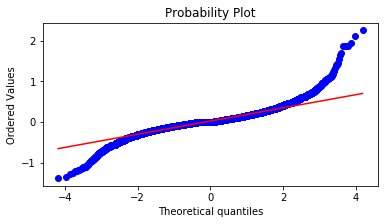

In [77]:
print(KNN())

### GradientBoostingRegressor

In [78]:
def GradientBoostingRegressor():
    from sklearn.ensemble import GradientBoostingRegressor as xgb 
    from sklearn.metrics import mean_squared_error, r2_score
    
    #Model fitting on training set
    clf_xgb = xgb(learning_rate=0.01, n_estimators=500, max_depth=3, subsample= 0.5)
    clf_xgb.fit(x_train, y_train)
    
    
    #prediction for train test and test test
    y_pred_train = clf_xgb.predict(x_train)
    y_pred_test = clf_xgb.predict(x_test)
    
    #Training and Testing MSE and RMSE
    train_mse = np.mean((y_train - clf_xgb.predict(x_train)) ** 2)
    test_mse = np.mean((y_test - clf_xgb.predict(x_test))** 2)
    print('     GradientBoostingRegressor       ')
    print("Train MSE is",train_mse)
    print("Test MSE is",test_mse)
    print("Train RMSE is:",np.sqrt(train_mse))
    print("Test RMSE is",np.sqrt(test_mse))
    
    
    #r2 Score value
    r2 = r2_score(y_test,y_pred_test)
    print("r2 score is",r2)
    print('     GradientBoostingRegressor       ')
    
    #Plotting Residual Plot
    residual=y_train-y_pred_train
    residual=residual.values.reshape(len(residual),1)
    plt.scatter(y_train,residual,c = "red")
    plt.xlabel("residual")
    plt.ylabel("y_test")
    plt.axhline(y = 0)
    
    #Checming Normality Condition
    import scipy as sp
    fig, ax = plt.subplots(figsize=(6,3))
    _, (__, ___, r) = sp.stats.probplot(residual.reshape((len(residual),)), plot=ax, fit=True)
    

     GradientBoostingRegressor       
Train MSE is 0.045113225680680234
Test MSE is 0.04760182837216514
Train RMSE is: 0.2123987421824344
Test RMSE is 0.21817843241751725
r2 score is 0.9401719395991674
     GradientBoostingRegressor       
None


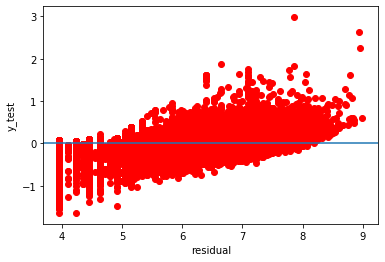

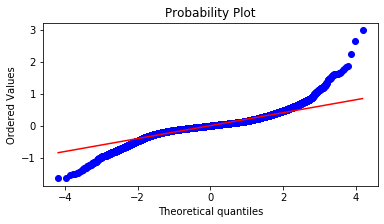

In [79]:
print(GradientBoostingRegressor())

### Based on OLS Model - Summary

In [81]:
def olslinearmodel():
    import statsmodels.api as sm    
    X = df3[['STD_Sales', 'Hist_Visits', 'W1_Min_Sale', 'W1_Visits', 'W2_Min_Sale',
       'W2_Visits', 'W3_Sale', 'W3_Max_Sale', 'W3_Min_Sale', 'W3_Visits',
       'W4_Sale', 'W4_Min_Sale', 'W4_Visits', 'W5_Visits', 'week_1', 'week_2',
       'week_3', 'week_4', 'APV', 'Type_is_Frequent_Visitor',
       'Type_is_Rare_Visitor', 'Type_is_Regular_Visitors']]
    X = sm.add_constant(X)
    regr2 = sm.OLS(df3['Total_Sale'],X)
    model = regr2.fit()
    
    print(model.summary())

In [82]:
olslinearmodel()

                            OLS Regression Results                            
Dep. Variable:             Total_Sale   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                 5.065e+04
Date:                Sun, 10 May 2020   Prob (F-statistic):               0.00
Time:                        15:06:15   Log-Likelihood:                 6286.4
No. Observations:               69964   AIC:                        -1.253e+04
Df Residuals:                   69942   BIC:                        -1.233e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

# Comparing the Models

| Algorithm | Train RMSE | Test RMSE | R2 Score|
| --- | --- | --- | --- |
| Linear Regression | 0.2190 | 0.2261 | 0.9357 |
| Ridge Regression | 0.2190 | 0.2261 | 0.9357 |
| Lasso Regression | 0.2991 | 0.3059 | 0.8823 |
| Decision Regression | 0.4124 | 0.4155 | 0.7829 |
| Random Forest Regression | 0.0649 | 0.1555 | 0.9695 |
| KNearest Neighbor Regression | 0.1704 | 0.2486 | 0.9222 |
| Gradient Boosting Regressor | 0.2123 | 0.2181 | 0.9401 |